In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

%matplotlib inline

df = pd.read_csv('eda_cleaned_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,city,state,same_state,company_age,job_tag,job_level,num_competitors,region
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,116,93.0,Chantilly,VA,0,52,data scientist,NaN,0,SouthEast
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,116,93.0,Boston,MA,1,-1,data scientist,NaN,0,NorthEast
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,116,93.0,Cincinnati,OH,1,28,other,NaN,0,MidWest
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,116,93.0,New Castle,DE,0,-1,other,NaN,2,NorthEast
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,116,93.0,Austin,TX,0,179,data scientist,NaN,2,SouthWest


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'city', 'state',
       'same_state', 'company_age', 'job_tag', 'job_level', 'num_competitors',
       'region'],
      dtype='object')

In [37]:
# interested categories 

cat = ['job_tag', 'job_level', 'state', 'Size', 'Industry', 'Sector', 'Type of ownership', 'Rating', 'Revenue', 'avg_salary', 'company_age', 'num_competitors', 'region']

model_df = df[cat]
print(model_df.shape)
model_df.head()

(300, 13)


,job_tag,job_level,state,Size,Industry,Sector,Type of ownership,Rating,Revenue,avg_salary,company_age,num_competitors,region
0,data scientist,NaN,VA,5001 to 10000 employees,Research & Development,Business Services,Company - Public,4.2,$1 to $2 billion (USD),93.0,52,0,SouthEast
1,data scientist,NaN,MA,201 to 500 employees,Health Care Services & Hospitals,Health Care,Hospital,3.6,Unknown / Non-Applicable,93.0,-1,0,NorthEast
2,other,NaN,OH,201 to 500 employees,Consulting,Business Services,Company - Private,4.6,$50 to $100 million (USD),93.0,28,0,MidWest
3,other,NaN,DE,201 to 500 employees,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Company - Private,3.9,$100 to $500 million (USD),93.0,-1,2,NorthEast
4,data scientist,NaN,TX,1001 to 5000 employees,IT Services,Information Technology,Company - Private,3.1,$1 to $2 billion (USD),93.0,179,2,SouthWest


In [38]:
per_missing = (round((model_df.isna().sum()/model_df.shape[0]) * 100,2).to_frame(name = '% of missing values'))

print(per_missing)
for index, row in per_missing.iterrows():
    if row[0] > 50:
#         print('yes')
        model_df.drop(labels=index, inplace=True, axis=1)
    else:
#         pass
        model_df.fillna('Unknown', inplace=True)
    
model_df.isna().sum()

                   % of missing values
job_tag                           0.00
job_level                        76.33
state                             4.33
Size                              0.00
Industry                          0.00
Sector                            0.00
Type of ownership                 0.00
Rating                            0.00
Revenue                           0.00
avg_salary                        0.00
company_age                       0.00
num_competitors                   0.00
region                            4.67


C:\Users\Ekene\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Ekene\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


job_tag              0
state                0
Size                 0
Industry             0
Sector               0
Type of ownership    0
Rating               0
Revenue              0
avg_salary           0
company_age          0
num_competitors      0
region               0
dtype: int64

In [39]:
model_df.region.unique()

array(['SouthEast', 'NorthEast', 'MidWest', 'SouthWest', 'West',
       'Unknown'], dtype=object)

In [40]:
# linearregression
# decision tree
# Random Forrest


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


dum_model_df = pd.get_dummies(model_df)
X = dum_model_df.drop('avg_salary', axis = 1)
y = dum_model_df['avg_salary']



ls = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

from sklearn.metrics import mean_absolute_error 

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = [ls, dt, rf]
names = ['ls', 'dt', 'rf']
results= []
predictions = []
for model in models:
    kfold = KFold(n_splits=10, random_state = 42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='neg_mean_absolute_error')
    results.append(cv_results)
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    mse = (mean_absolute_error(y_test, pred))
    print('ML Model: ', model, 'Avg. Cross Val score: ', cv_results.mean(), 'Mean Absolute Error:', mse)
    # mse = []
    # for model, score, pred in zip(models, cv_results.mean(), predictions):
    #     mse = (mean_absolute_error(y_test, pred))
    #     print(model, score, mse)  


ML Model:  Lasso() Avg. Cross Val score:  -20.271746437417878 Mean Absolute Error: 18.844212042481537
ML Model:  DecisionTreeRegressor() Avg. Cross Val score:  -24.095634920634918 Mean Absolute Error: 25.322222222222223
ML Model:  RandomForestRegressor() Avg. Cross Val score:  -21.26122851473923 Mean Absolute Error: 21.135035141093475


[Text(0, 0, 'ls'), Text(0, 0, 'dt'), Text(0, 0, 'rf')]

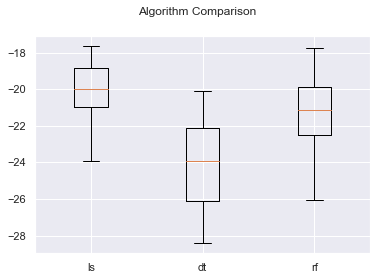

In [41]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)


From above we can see that Lasso gives us the best results. We can do further analysis on different erros. 

In [42]:
# import pickle
# pickl = {'model' : ls}
# pickle.dump( pickl, open('FlaskAPI/models/lasso_model' + '.p', 'wb'))

# pickl2 = {'test_data': X_test}
# pickle.dump(pickl2, open('FlaskAPI/test_dat' +'.p', 'wb'))

In [43]:
# def load_models():
#     file_name = 'FlaskAPI/models/lasso_model.p'
#     with open(file_name, 'rb') as pickled:
#         data = pickle.load(pickled)
#         model=data['model']
#     return model

# model = load_models()

# pred = model.predict(X_test.iloc[5,:].values.reshape(1,-1))

# print(pred)

[107.99005788]


In [59]:
corr = dum_model_df.drop('avg_salary', axis=1).corrwith(model_df.avg_salary)

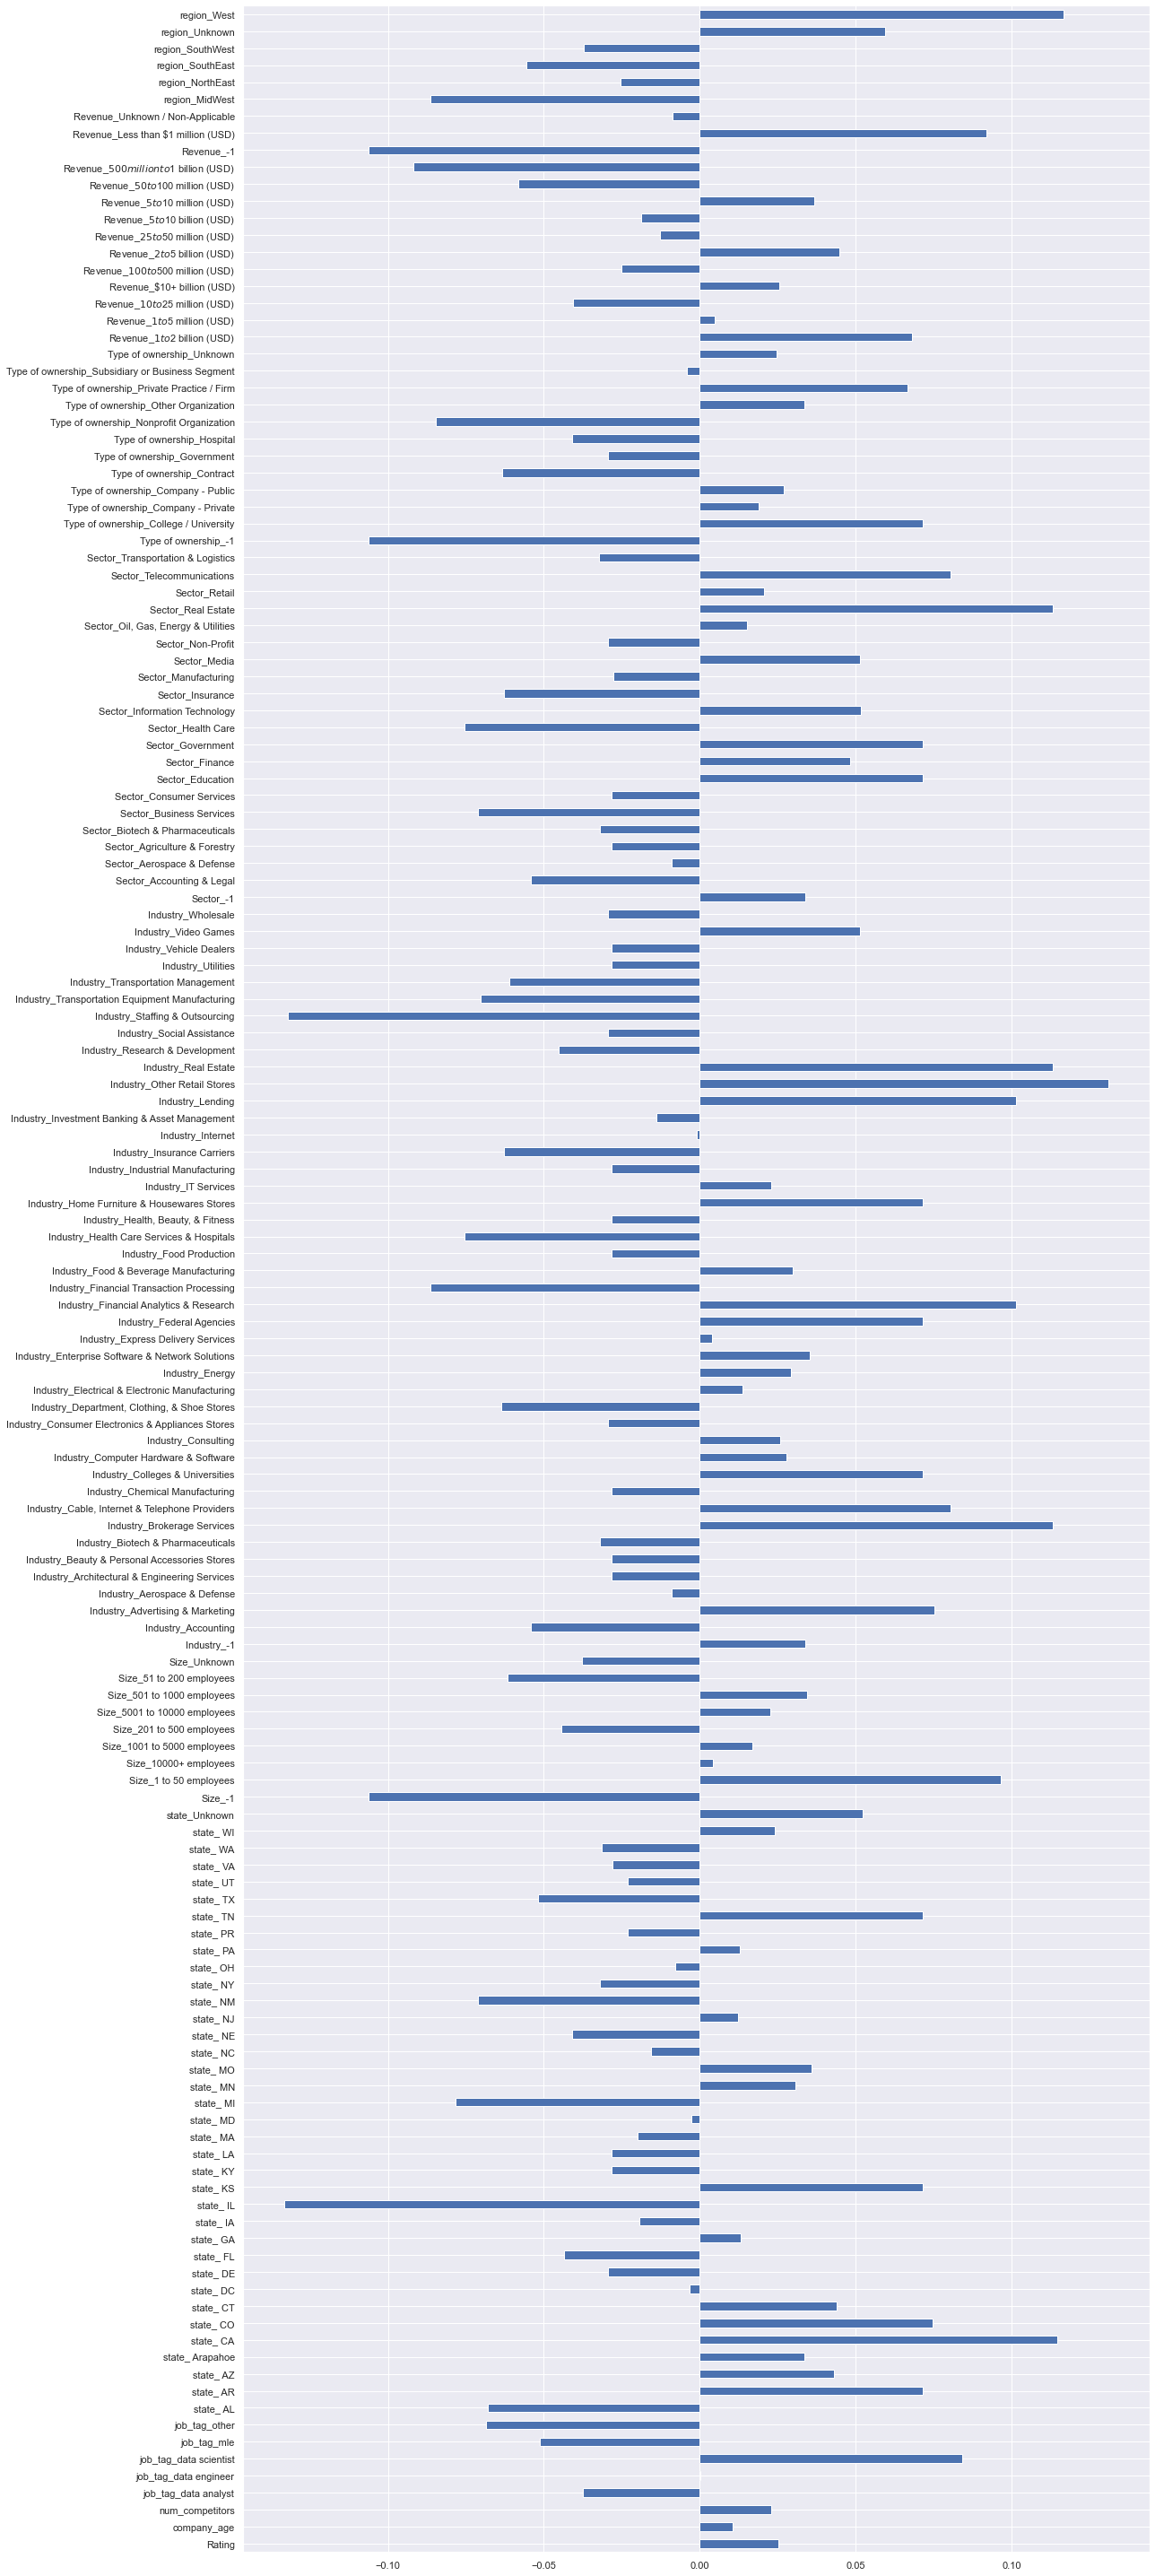

In [66]:
fig, ax = plt.subplots(figsize=(18,40))
corr.plot(kind='barh', ax =ax)
plt.tight_layout()

In [46]:
model_df.columns

Index(['job_tag', 'state', 'Size', 'Industry', 'Sector', 'Type of ownership',
       'Rating', 'Revenue', 'avg_salary', 'company_age', 'num_competitors',
       'region'],
      dtype='object')